In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     | 133.1 MB 93.3 MB/s
     |████████████████████████████████| 6.3 MB 3.9 MB/s 
     |████████████████████████████████| 219 kB 62.6 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759609 sha256=fc7eed793d392d1fdda5af347fbd51fdbae76ca4cff54af9e85bbdfccc894f88
  Stored in directory: /tmp/pip-ephem-wheel-cache-mp3_7anf/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-an

In [ ]:
from sklearn import linear_model
import sklearn
import gzip
import os
from collections import defaultdict
import random
import pandas as pd
from sklearn import linear_model
import dateutil.parser
from datetime import timedelta
from tqdm import tqdm
import csv
import pickle
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/UCSD_assignments/CS258/Assignment2/working_folder"
os.chdir(path)

In [ ]:
with open("Places_GPS_mapping.pkl","rb") as fp:
    place_id_co_ordinates_mapping = pickle.load(fp)

In [ ]:
with open("Filtered_train.pkl","rb") as fp:
    review_train = pickle.load(fp)

In [ ]:
review_train[0]

{'categories': ['Asian Restaurant', 'Chinese Restaurant'],
 'gPlusPlaceId': '106591714648856494903',
 'gPlusUserId': '100000032416892623125',
 'gps': (40.179159, -122.236162),
 'rating': 4.0,
 'reviewText': 'Best War Wanton soup in Red Bluff',
 'reviewTime': 'Mar 12, 2014',
 'reviewerName': 'william spindler',
 'unixReviewTime': 1394669496}

In [ ]:
# data = [[d['gPlusUserId'],d['gPlusPlaceId'], d['rating']] for d in review_train ]

In [ ]:
review_df = pd.DataFrame(review_train)

In [ ]:
lat_long = review_df['gps']
lat = [x[0] for x in lat_long]
lon = [x[1] for x in lat_long]

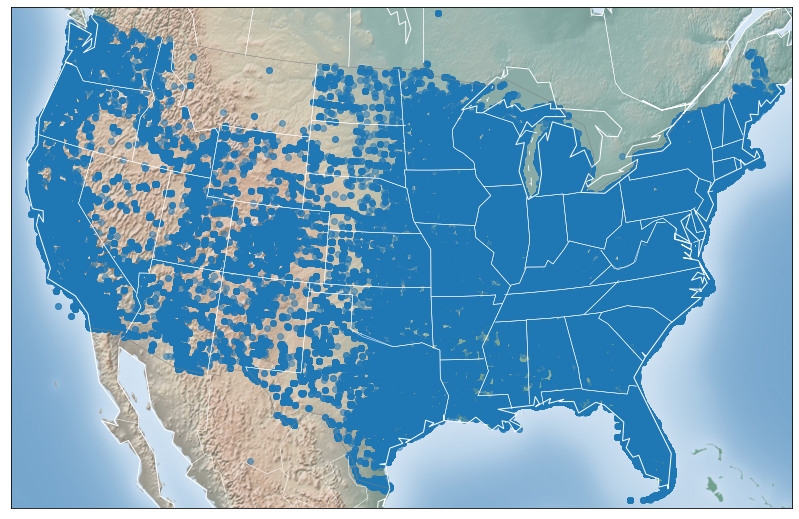

In [ ]:
fig = plt.figure(figsize=(14, 14))
# m = Basemap(projection='lcc', resolution='h',
#             lat_0=37.5, lon_0=-119,
#             width=1E6, height=1.2E6)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.shadedrelief()
m.drawcoastlines(color='white')
m.drawcountries(color='gray')
m.drawstates(color='white')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          cmap='Reds', alpha=0.5)

# # 3. create colorbar and legend
# plt.colorbar(label=r'$\log_{10}({\rm population})$')
# plt.clim(3, 7)

# # make legend with dummy points
# for a in [100, 300, 500]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');

In [ ]:
min_lat = 20
max_lat = 60

min_long = -125
max_long = -60

In [ ]:
print(min_lat,max_lat)
print(min_long,max_long)

-73.878195 71.30124
-180.0 180.0


In [ ]:
sum([1 for x in lat if x >= min_lat and x <= max_lat])

4900118

In [ ]:
sum([1 for x in lon if x >= min_long and x <= max_long])

4872893

In [ ]:
def grid_id(lat,lon,lat_lines,long_lines):
  if lat < lat_lines.min() or lat > lat_lines.max() or lon < long_lines.min() or lon > long_lines.max():
    return (-1,-1)
  else:
    grid_lat = lat_lines[np.searchsorted(lat_lines,lat)]
    grid_long = long_lines[np.searchsorted(long_lines,lon)]
    return (grid_lat,grid_long)

In [ ]:
lat_lines = np.linspace(min_lat,max_lat,num=max_lat-min_lat +1)
long_lines = np.linspace(min_long,max_long,num=max_long-min_long+1)

import itertools

grid = itertools.product(lat_lines,long_lines)

grid_dict = defaultdict(set)


In [ ]:
for d in review_train:
  gps = d['gps']
  tup = grid_id(gps[0],gps[1],lat_lines,long_lines)
  grid_dict[tup].add(d['gPlusPlaceId'])

In [ ]:
# with open("Grid_dict.pkl","wb") as fp:
#     pickle.dump(grid_dict,fp)